# CLIP 유사도 Matrix

> 런타임 유형 꼭 GPU 설정하기

> 빈칸을 채우고 실행하는 문제입니다.



In [1]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-x5u7sdi1
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-x5u7sdi1
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
!pip install ftfy regex tqdm
!pip install seaborn
from google.colab import files
files.upload()


Saving cat.jpg to cat.jpg
Saving dog.jpg to dog.jpg
Saving car.jpg to car.jpg
Saving pizza.jpg to pizza.jpg
Saving guitar.jpg to guitar.jpg


{'cat.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01\xab\x01\xab\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x1

In [10]:
import os
import torch
import clip
from PIL import Image
import torch.nn.functional as F

# 1. 디바이스 설정
device = "cuda" if torch.cuda.is_available() else "cpu"

# 2. CLIP 모델 불러오기
model, preprocess = clip.load("ViT-B/32", device=device)

# 3. 이미지 파일 목록 (./images 폴더에 저장되어 있어야 함)
image_filenames = [
    "cat.jpg",
    "dog.jpg",
    "car.jpg",
    "pizza.jpg",
    "guitar.jpg"
]
image_paths = [
    "cat.jpg",
    "dog.jpg",
    "car.jpg",
    "pizza.jpg",
    "guitar.jpg"
]

# 4. 텍스트 프롬프트
# 기존 텍스트 + distractor 프롬프트 추가
text_prompts = [
    "a photo of a cat",
    "a photo of a dog",
    "a photo of a car",
    "a photo of a pizza",
    "a photo of a guitar",
    "a photo of a horse",
    "a photo of a hamburger",
    "a photo of a piano"
]


# 5. 이미지 전처리 및 배치
image_tensors = [preprocess(Image.open(img_path).convert("RGB")) for img_path in image_paths]
image_input = torch.stack(image_tensors).to(device)

# 6. 텍스트 토큰화
text_tokens = clip.tokenize(text_prompts).to(device)

# 7. 특징 추출 (with torch.no_grad for inference)
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_tokens)

# 8. 정규화 (cosine similarity 위해 L2 normalization)
image_features = F.normalize(image_features, dim=1)
text_features = F.normalize(text_features, dim=1)

# 9. cosine similarity matrix 계산 (5x5)
similarity_matrix = image_features @ text_features.T

# 10. 출력
print("Cosine Similarity Matrix (Image × Text):")
print(similarity_matrix)

# 선택: 가장 유사한 텍스트 인덱스 출력
best_matches = similarity_matrix.argmax(dim=1)
for i, idx in enumerate(best_matches):
    print(f"Image {image_filenames[i]} → {text_prompts[idx]}")


Cosine Similarity Matrix (Image × Text):
tensor([[0.2939, 0.2356, 0.2007, 0.1893, 0.1875, 0.2203, 0.2079, 0.1934],
        [0.2327, 0.2854, 0.2080, 0.2167, 0.2043, 0.2385, 0.2122, 0.2084],
        [0.1907, 0.1934, 0.2639, 0.1790, 0.2017, 0.1838, 0.1871, 0.1886],
        [0.1614, 0.1735, 0.1748, 0.2883, 0.1647, 0.1807, 0.1854, 0.1637],
        [0.2164, 0.2131, 0.1886, 0.1953, 0.2771, 0.2090, 0.1943, 0.1875]],
       device='cuda:0', dtype=torch.float16)
Image cat.jpg → a photo of a cat
Image dog.jpg → a photo of a dog
Image car.jpg → a photo of a car
Image pizza.jpg → a photo of a pizza
Image guitar.jpg → a photo of a guitar


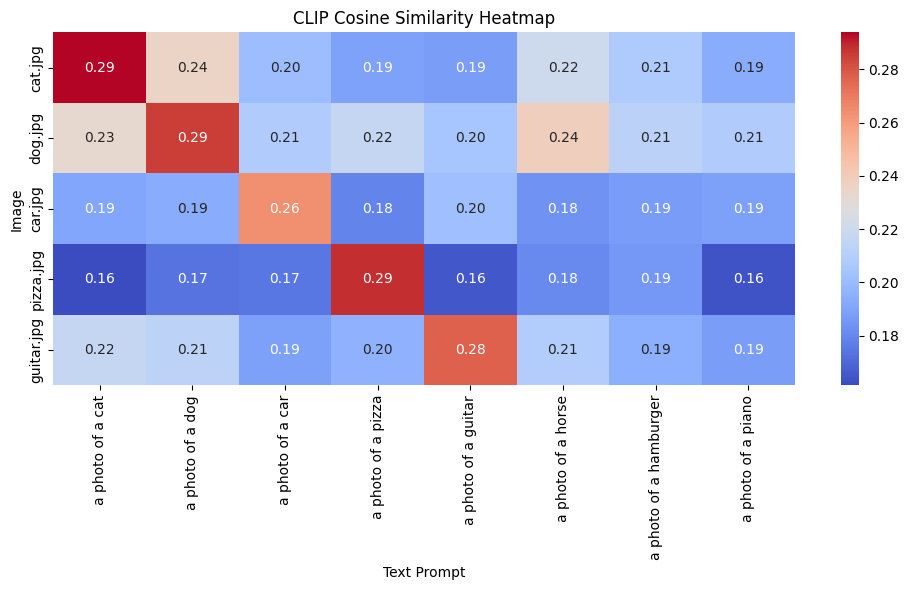

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 텍스트 & 이미지 라벨
labels = [
    "cat", "dog", "car", "pizza", "guitar"
]

# 2. similarity_matrix는 torch.Tensor → numpy로 변환
sim_matrix_np = similarity_matrix.cpu().numpy()

# 3. 히트맵 시각화
# 3. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(sim_matrix_np,
            xticklabels=text_prompts,
            yticklabels=image_filenames,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            cbar=True)

plt.xlabel("Text Prompt")
plt.ylabel("Image")
plt.title("CLIP Cosine Similarity Heatmap")
plt.tight_layout()
plt.show()

In [12]:
# 정답 인덱스 (앞의 5개 프롬프트가 정답쌍이라고 가정)
true_indices = torch.tensor([0, 1, 2, 3, 4]).to(device)

# Top-1 prediction
pred_indices = similarity_matrix.argmax(dim=1)

# Top-1 Accuracy
accuracy = (pred_indices == true_indices).float().mean().item()
print(f"\nTop-1 Accuracy: {accuracy * 100:.2f}%")



Top-1 Accuracy: 100.00%


In [14]:
# 각 이미지별로 유사도 높은 텍스트 상위 3개 인덱스 가져오기
top3_indices = similarity_matrix.topk(3, dim=1).indices

# Top-3 Accuracy 계산
top3_correct = torch.zeros(len(true_indices)).to(device)

for i in range(len(true_indices)):
    if true_indices[i] in top3_indices[i]:
        top3_correct[i] = 1.0

top3_accuracy = top3_correct.mean().item()
print(f"Top-3 Accuracy: {top3_accuracy * 100:.2f}%")

Top-3 Accuracy: 100.00%


#CLIP의 Cosine Similarity Heatmap 결과를 보고 정답쌍과 오답쌍의 유사도 차이가 어떻게 나타났는지 분석하시오. 또한 이러한 결과가 나타난 이유를 추론해보세요.


답:결과를 보면 정답 이미지-텍스트 쌍이 확실히 더 높은 유사도를 보이고 있다. 예를 들어, 고양이 이미지와 고양이 설명, 피자 이미지와 피자 설명 같은 정답 조합은 뚜렷하게 높은 유사도를 나타낸다. 반대로 다른 오답 조합들은 전반적으로 유사도가 더 낮게 나왔다. 이런 결과가 나온 이유는 CLIP 모델이 이미지와 텍스트를 함께 학습할 때 의미적으로 가장 잘 맞는 쌍을 더 비슷한 벡터로 표현하기 때문이다. 즉, CLIP은 의미적으로 연결된 쌍을 명확히 구분하도록 훈련되어 정답 쌍과 오답 쌍 간에 유사도 차이를 분명히 보여주는 것이다.